In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("../datasets/loan_underwriter_dataset.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
# shape of the data
df.shape

(396030, 27)

In [5]:
# statistical summary of the numberical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [6]:
# missing values
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [7]:
# data types of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [8]:
# converting columns with dtype = "object" to "category"
object_columns = df.select_dtypes(include = ["object"]).columns.to_list()

for i in object_columns:
    df[i] = df[i].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   loan_amnt             396030 non-null  float64 
 1   term                  396030 non-null  category
 2   int_rate              396030 non-null  float64 
 3   installment           396030 non-null  float64 
 4   grade                 396030 non-null  category
 5   sub_grade             396030 non-null  category
 6   emp_title             373103 non-null  category
 7   emp_length            377729 non-null  category
 8   home_ownership        396030 non-null  category
 9   annual_inc            396030 non-null  float64 
 10  verification_status   396030 non-null  category
 11  issue_d               396030 non-null  category
 12  loan_status           396030 non-null  category
 13  purpose               396030 non-null  category
 14  title                 394274 non-nul

In [9]:
# univariate analysis

In [10]:
numerical_columns = df.select_dtypes(include = ["int", "float"]).columns.to_list()
categorical_columns = df.select_dtypes(include = ["category"]).columns.to_list()

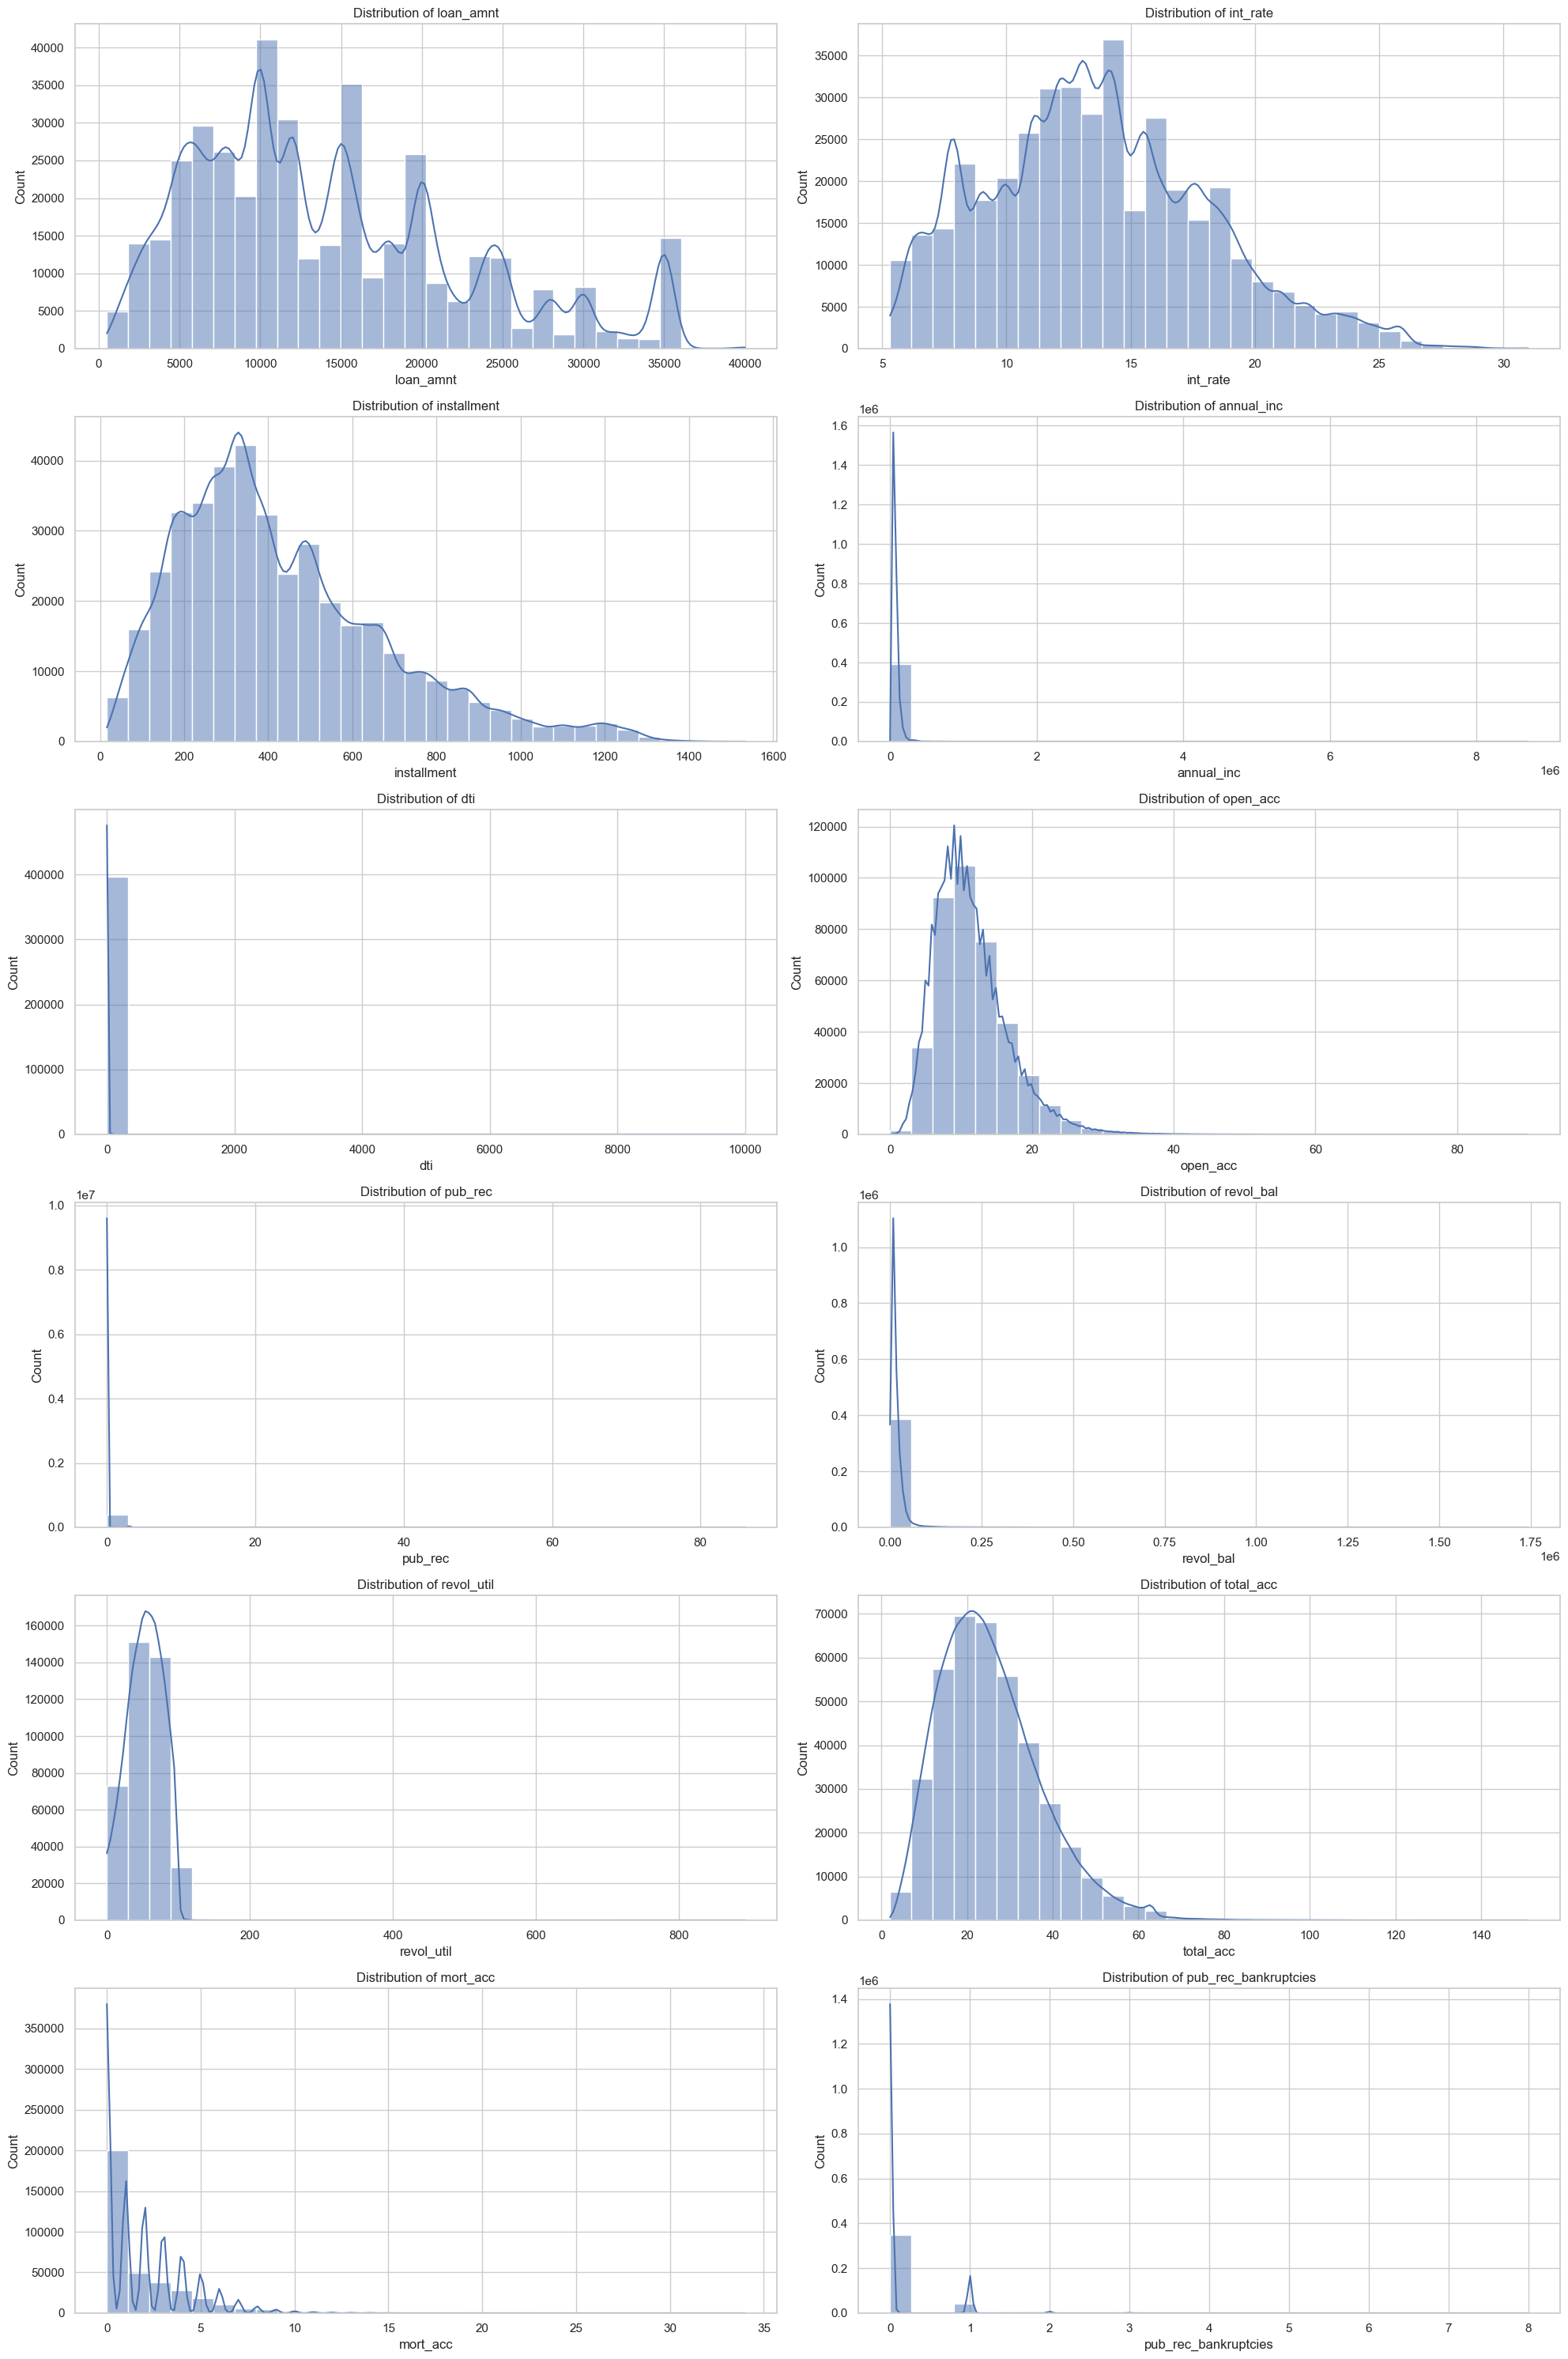

In [11]:
# distribution plots of all numerical values
plt.figure(figsize = (20, 30))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(6, 2, i)
    sns.histplot(df[column], kde = True, bins = 30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../artifacts/distribution_of_numerical_columns.png")
plt.show()

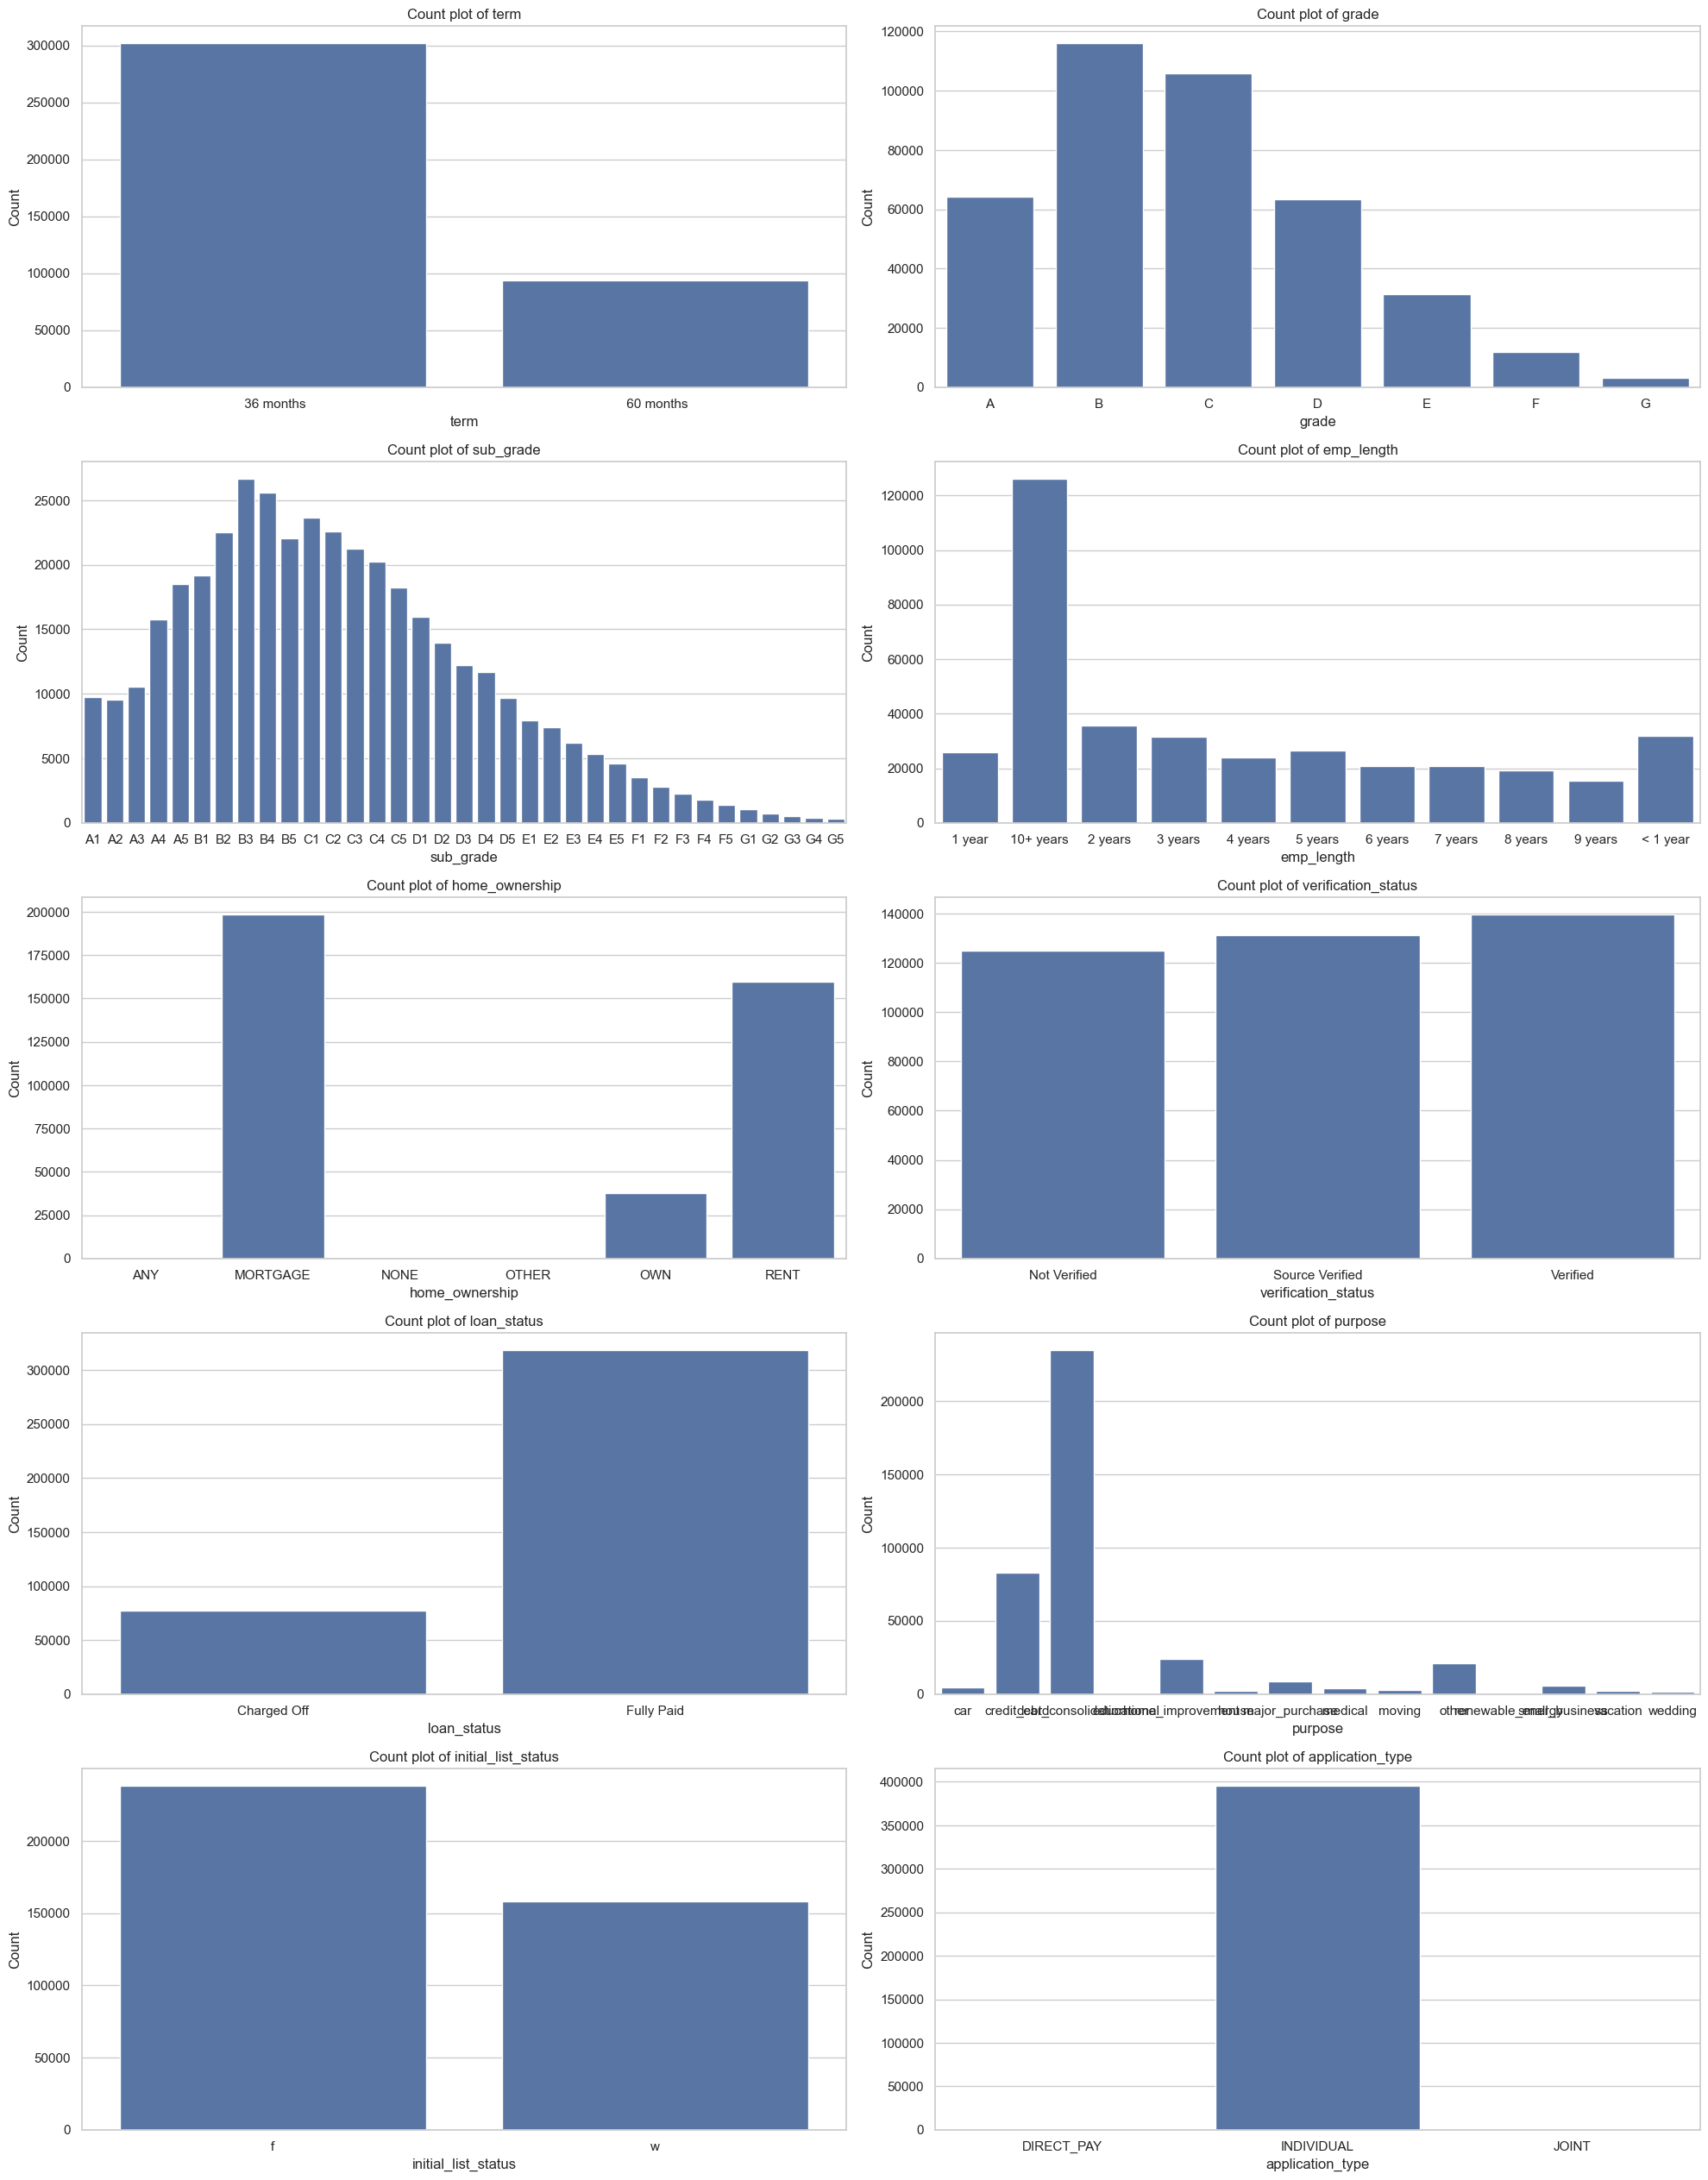

In [12]:
# count plots of all categorical columns
# ignoring the following columns as there are a lot of unique values in them
to_ignore = ('emp_title', 'issue_d', 'title', 'earliest_cr_line', 'address')
categorical_columns = [col for col in categorical_columns if col not in to_ignore]
# count plot of all the categorical columns
plt.figure(figsize = (20, 30))
for i, column in enumerate(categorical_columns, 1):
    if column not in to_ignore:
        plt.subplot(6, 2, i)
        sns.countplot(x = df[column], data = df)
        plt.title(f"Count plot of {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../artifacts/count_of_categorical_columns.png")
plt.show()

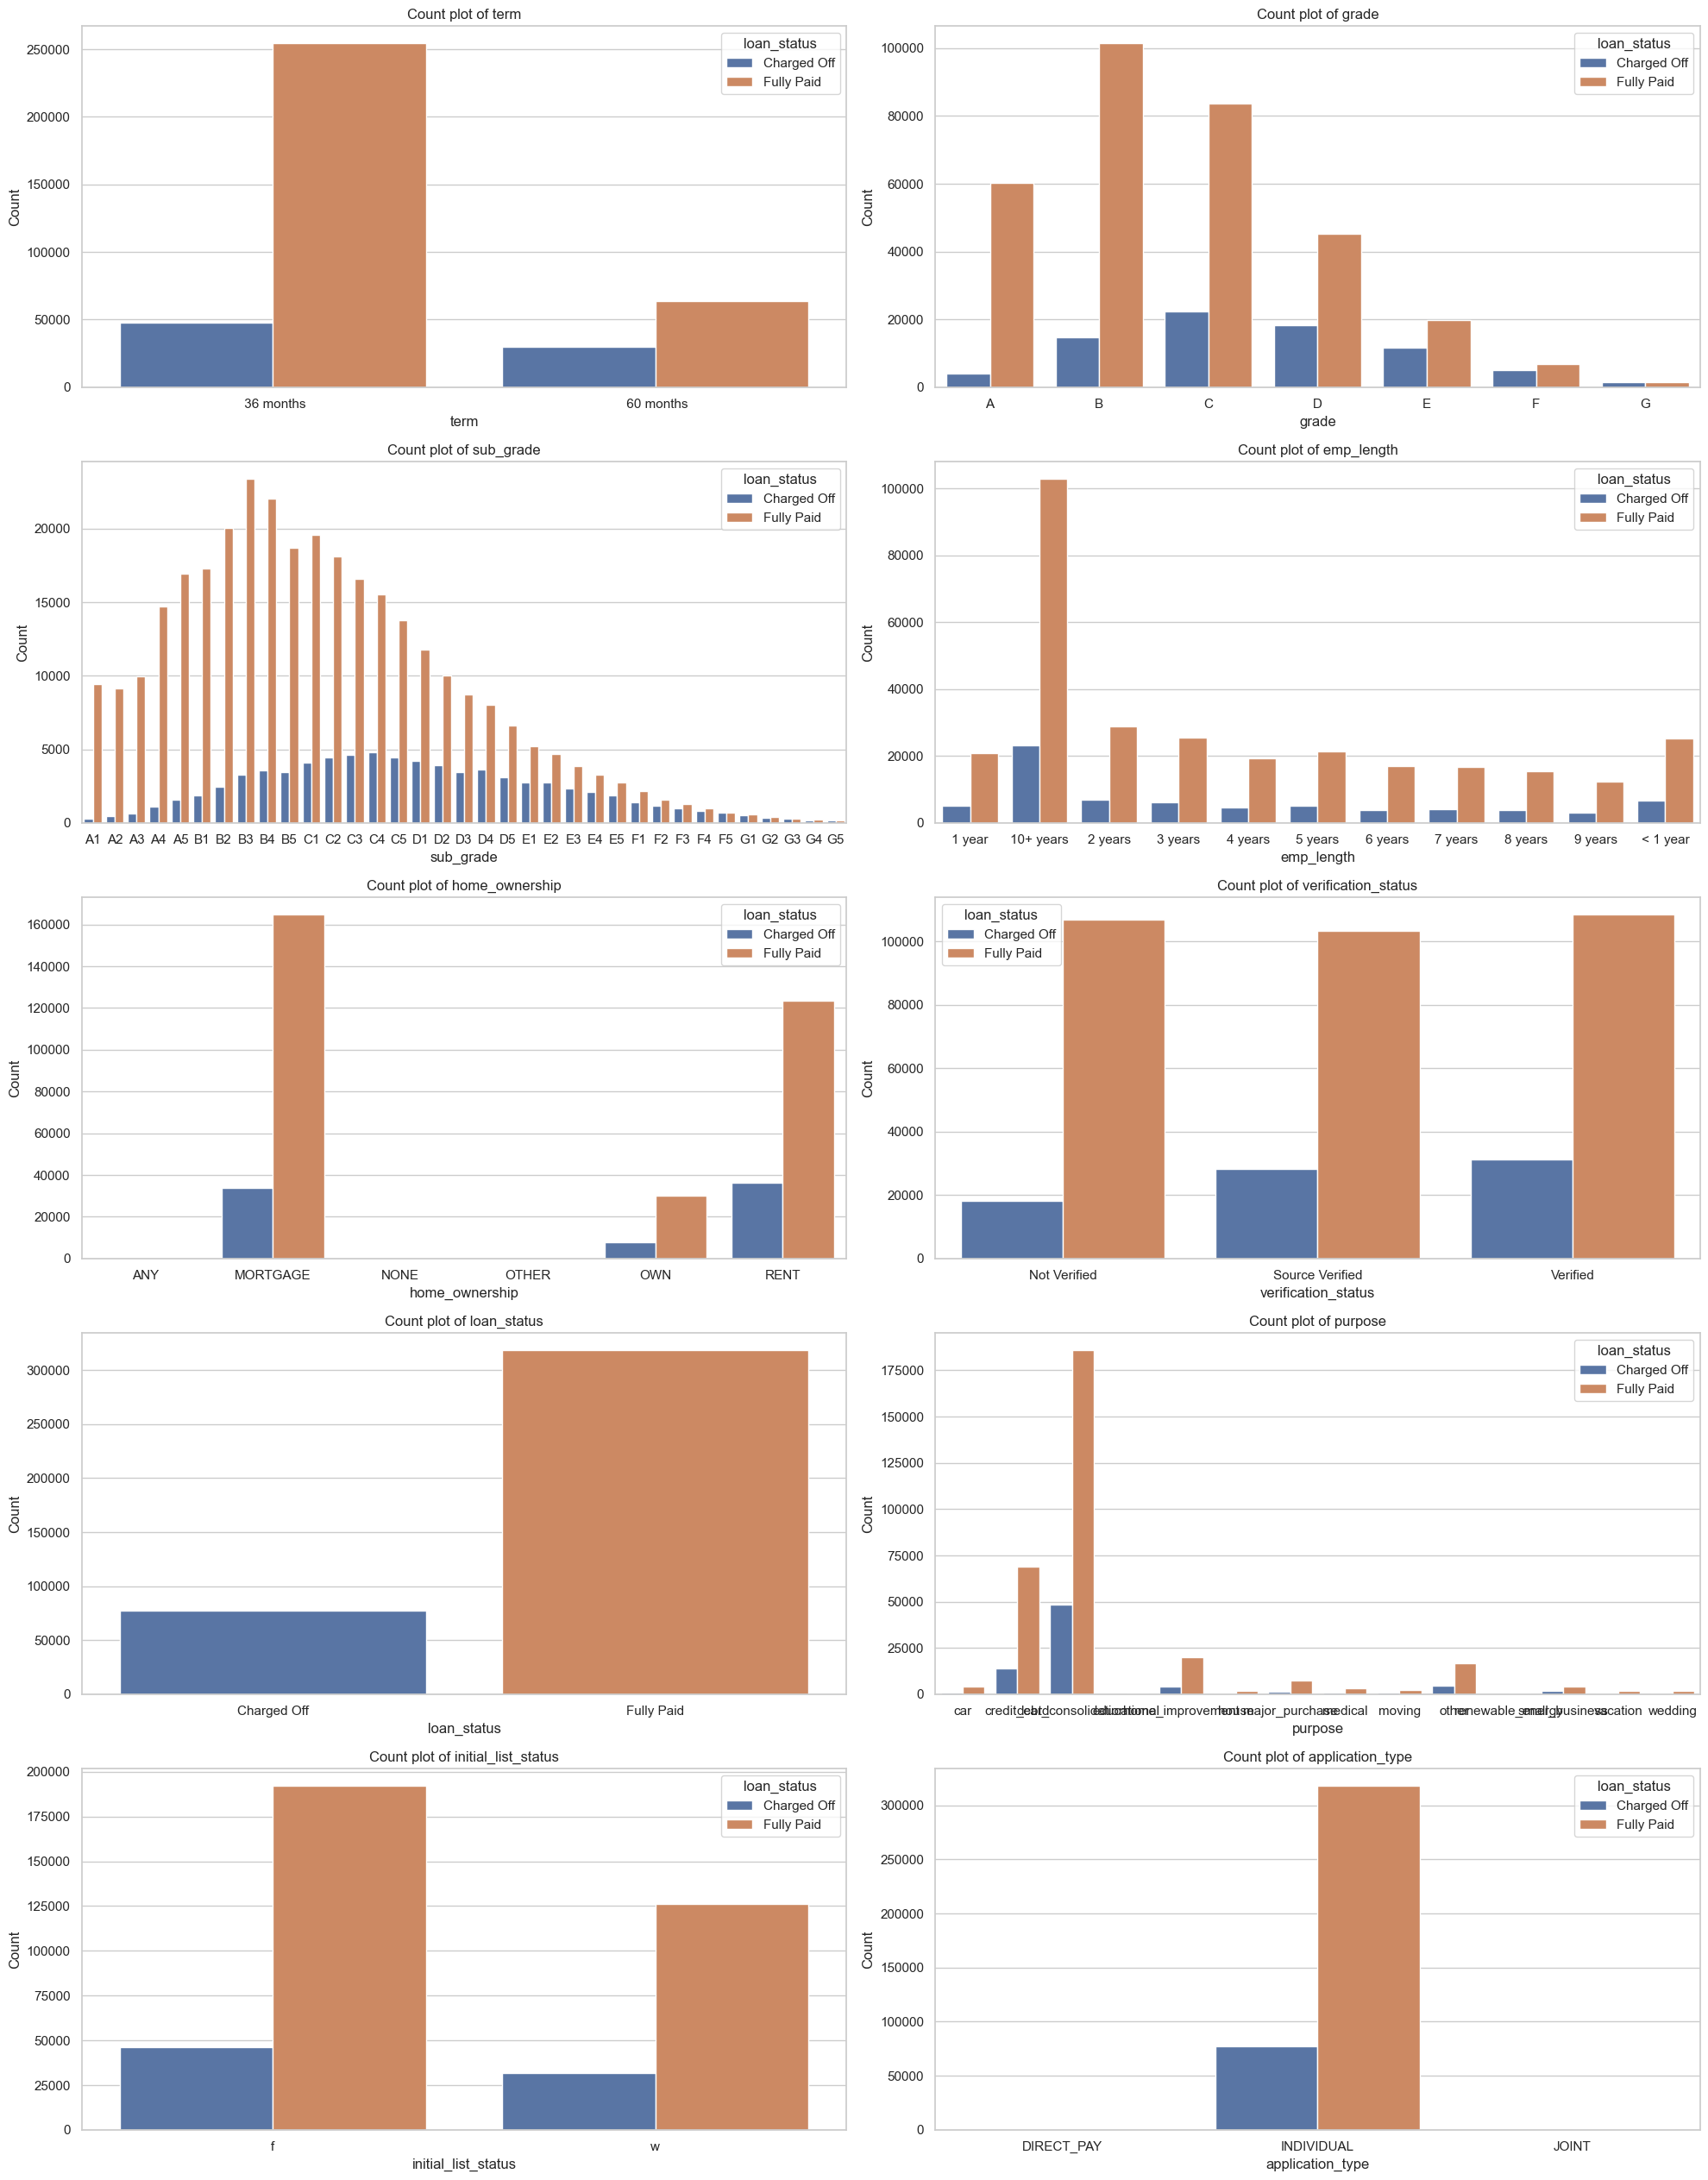

In [13]:
# count plot of all categorical columns with "loan_status" in hue
to_ignore = ('emp_title', 'issue_d', 'title', 'earliest_cr_line', 'address')
categorical_columns = [col for col in categorical_columns if col not in to_ignore]
# count plot of all the categorical columns
plt.figure(figsize = (20, 30))
for i, column in enumerate(categorical_columns, 1):
    if column not in to_ignore:
        plt.subplot(6, 2, i)
        sns.countplot(x = df[column], data = df, hue = df["loan_status"])
        plt.title(f"Count plot of {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../artifacts/count_of_categorical_columns_with_loan_status_in_hue.png")
plt.show()

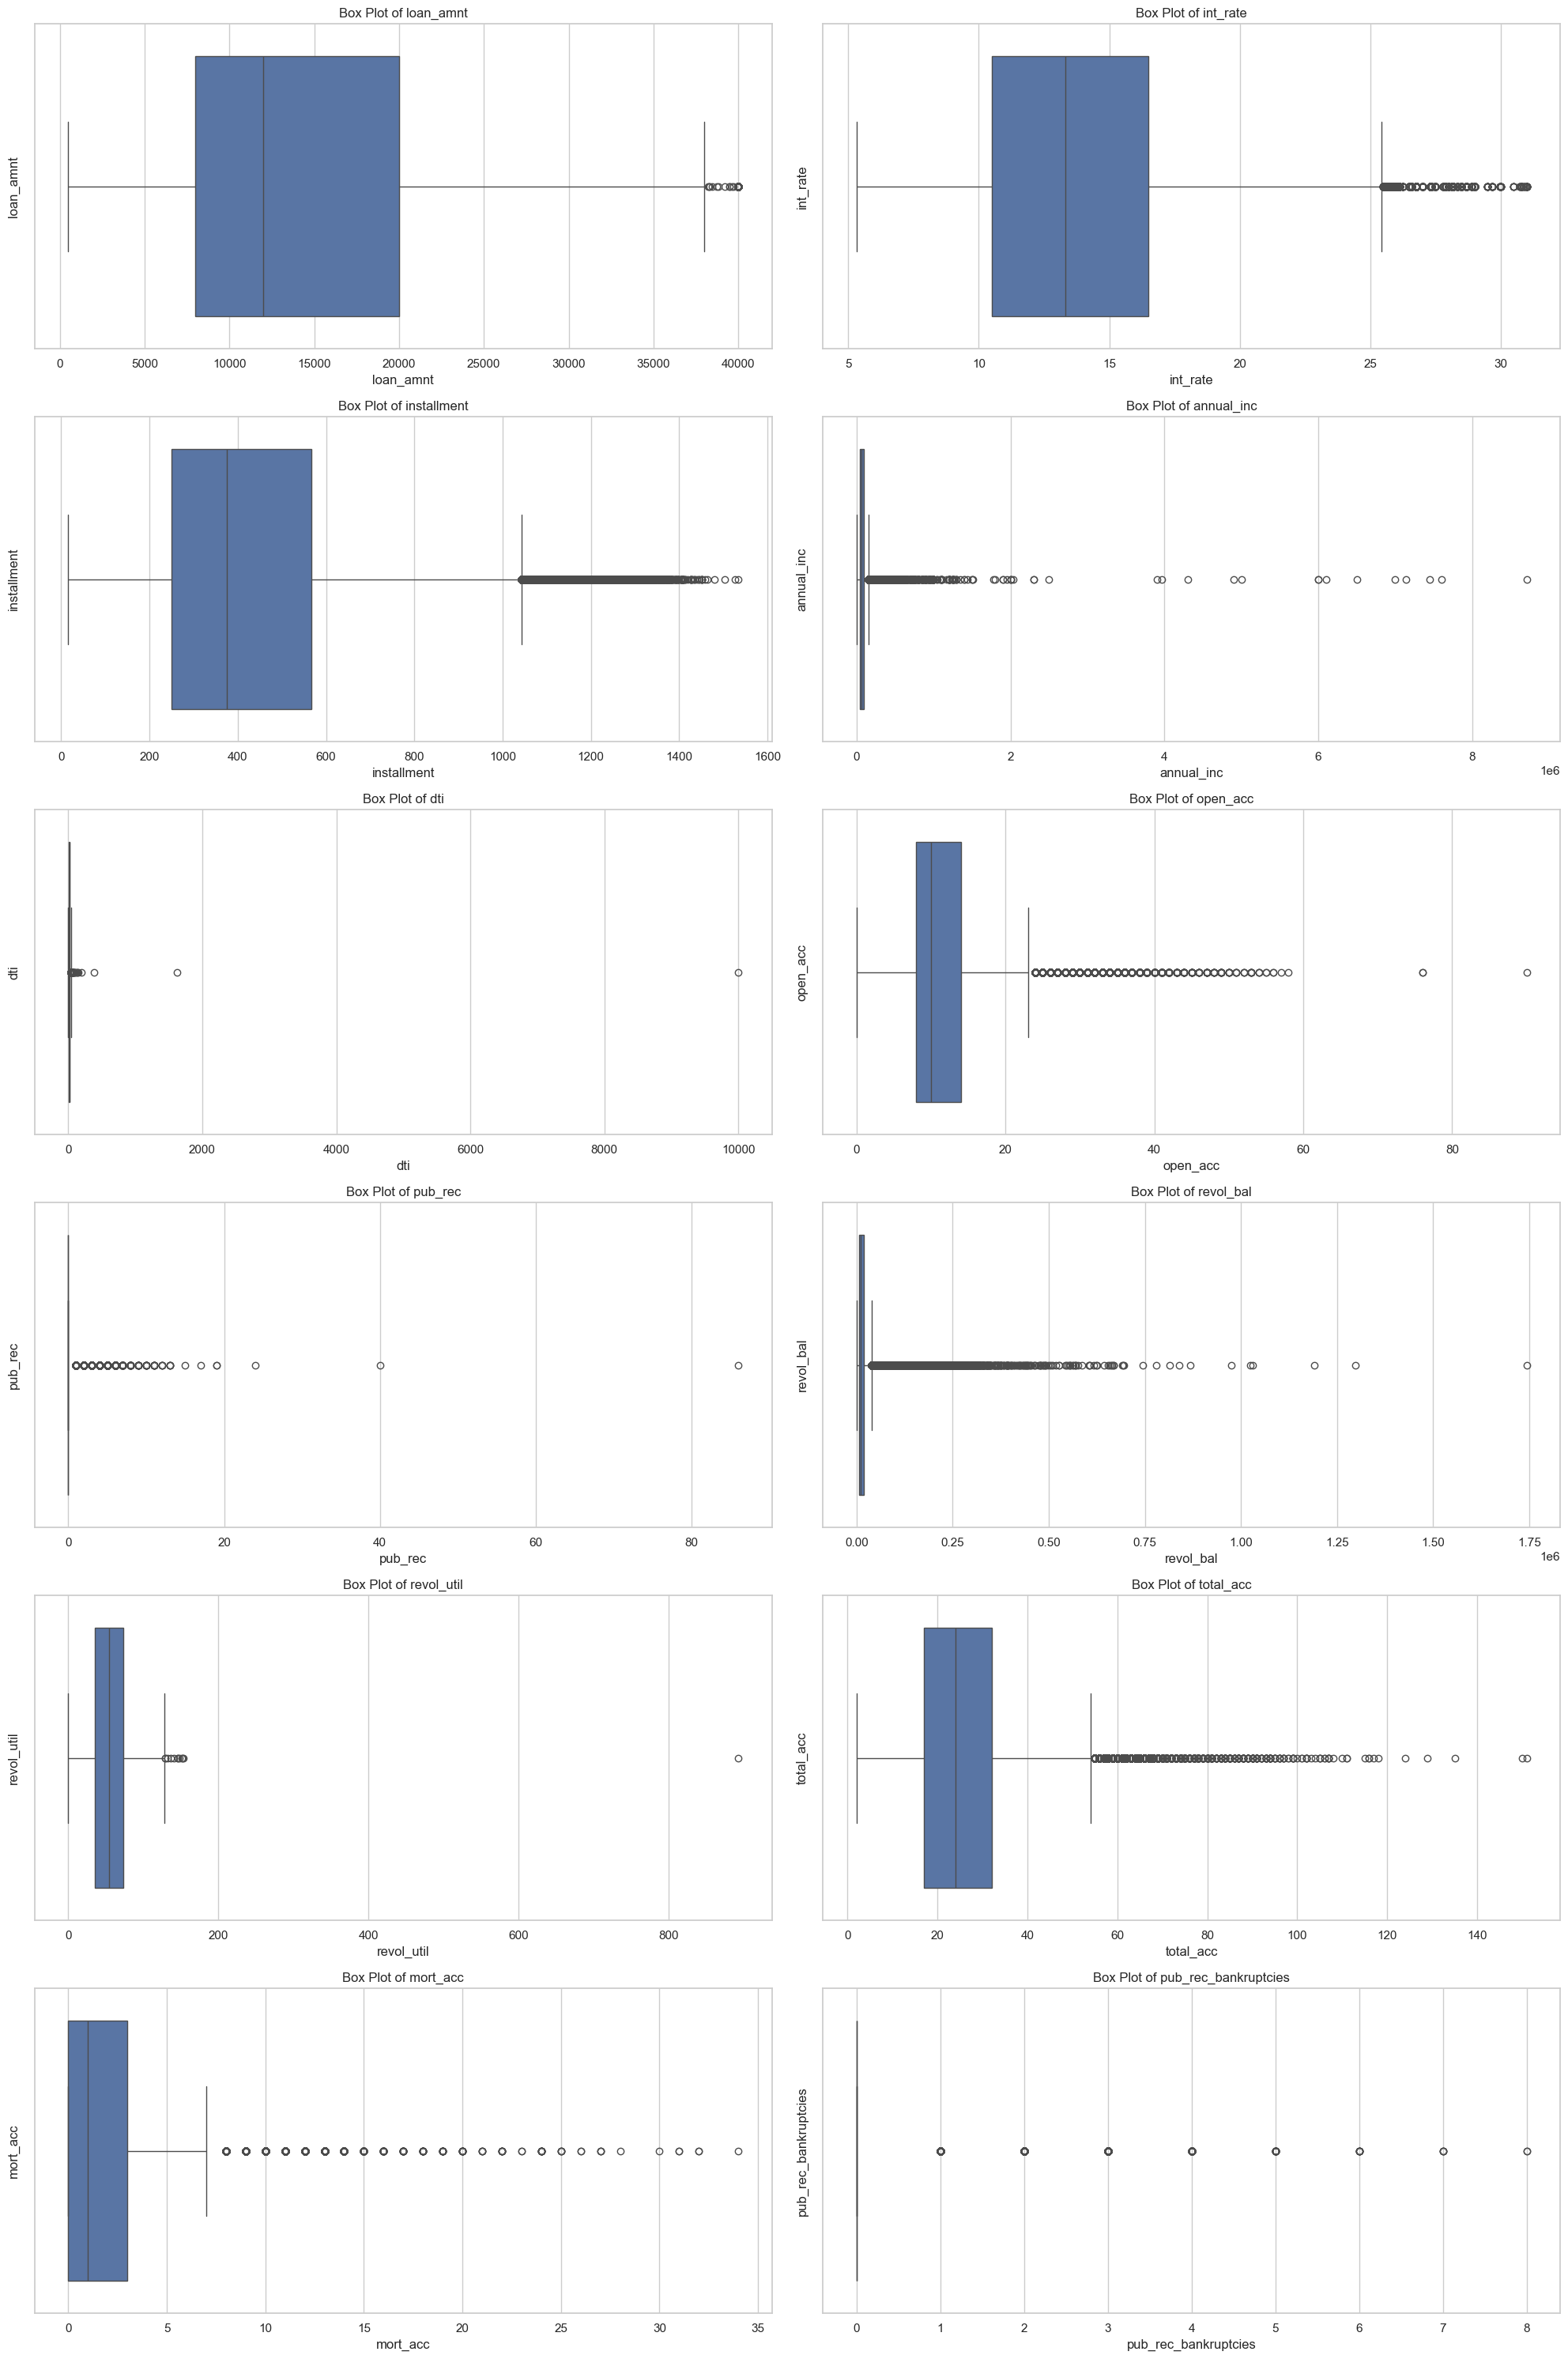

In [14]:
# box plot of all numerical columns
plt.figure(figsize = (20, 30))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(6, 2, i)
    sns.boxplot(x = df[column], data = df)
    plt.title(f"Box Plot of {column}")
    plt.ylabel(column)
plt.tight_layout()
plt.savefig("../artifacts/box_plots_of_numerical_columns.png")
plt.show()

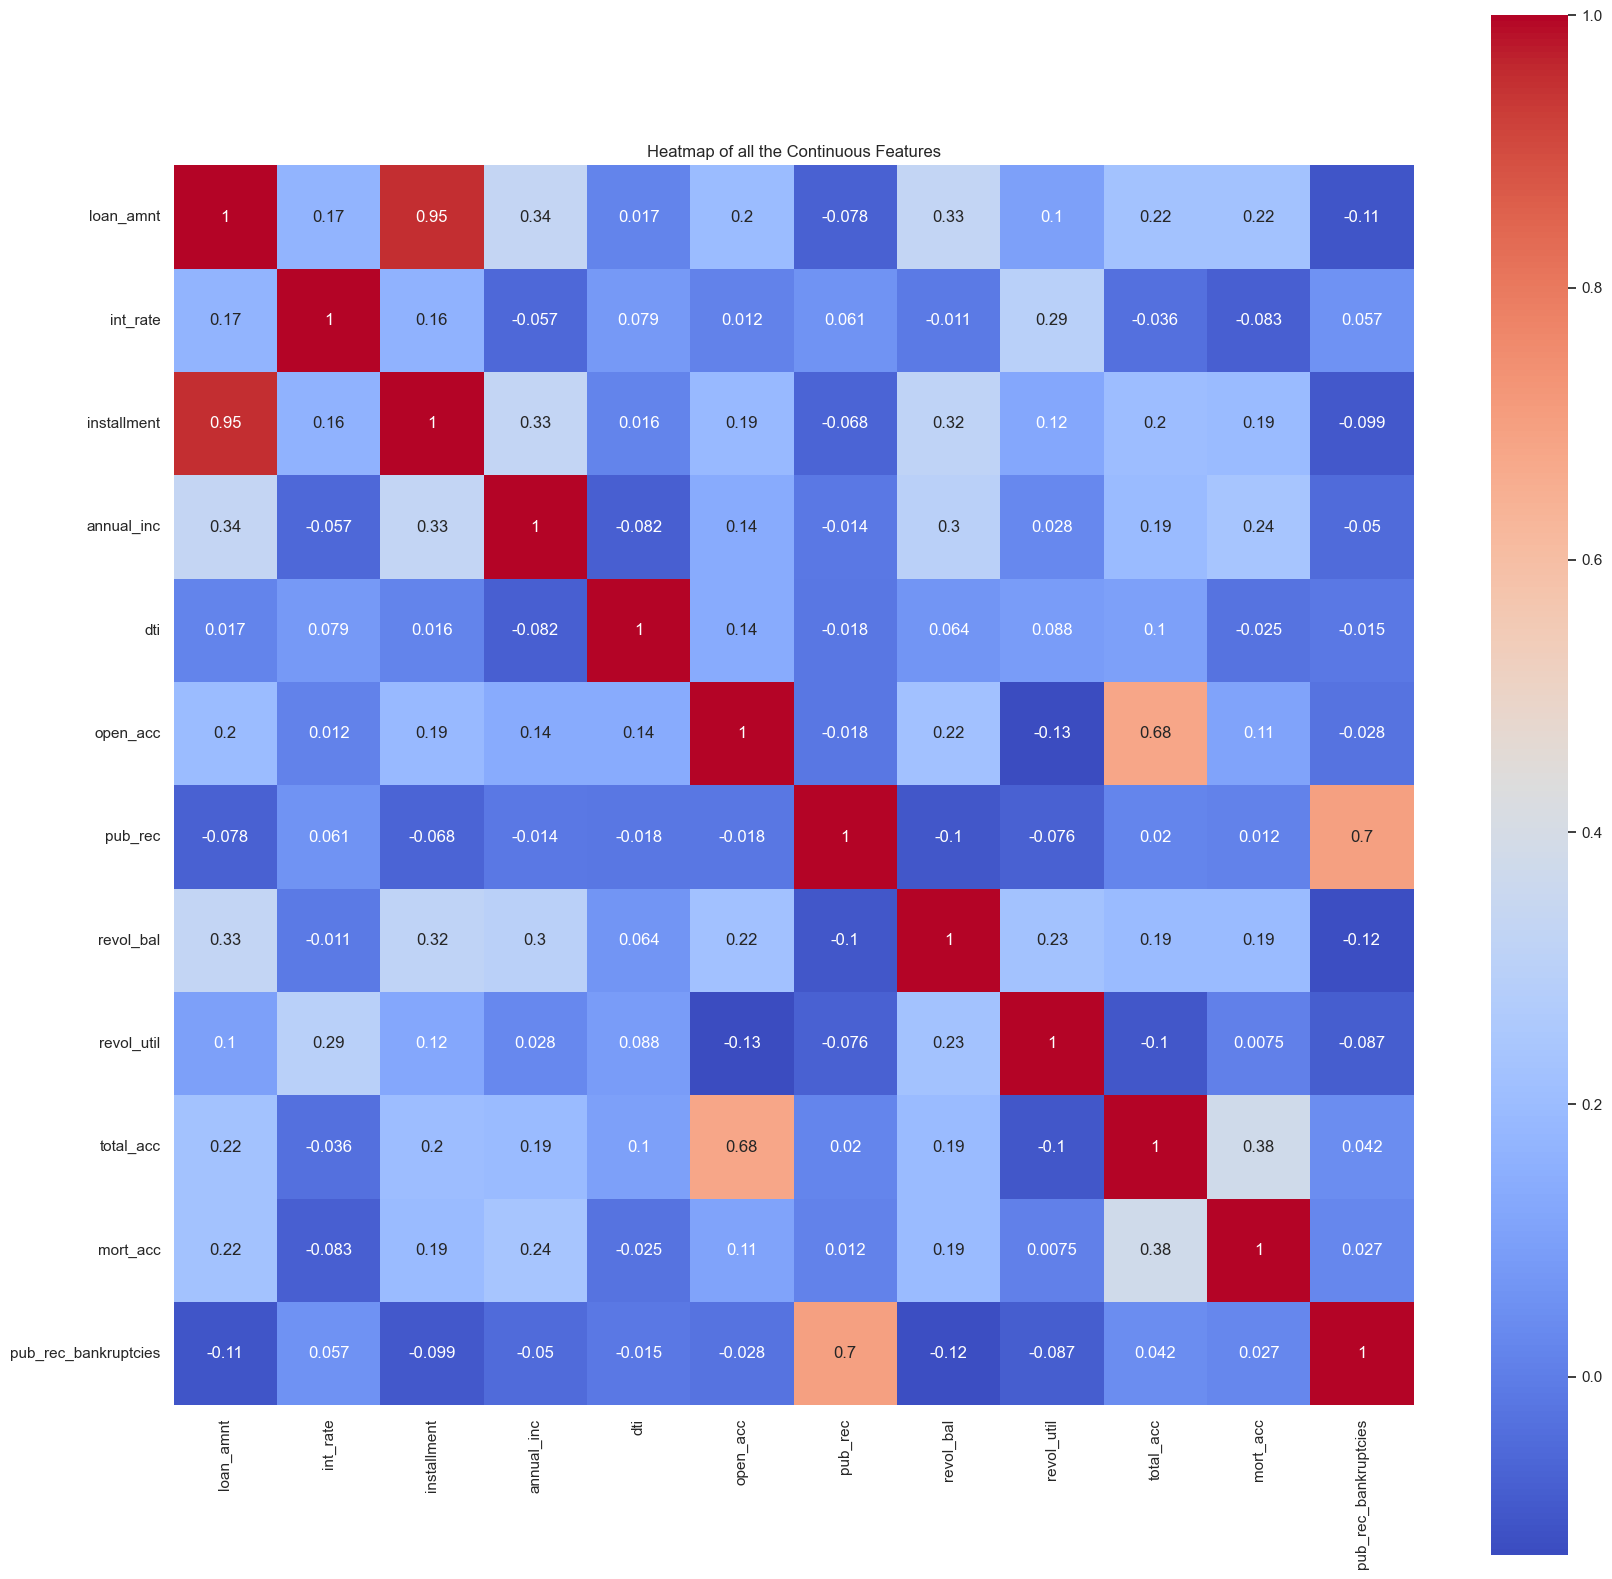

In [15]:
# bivariate analysis
df_num = df[numerical_columns]
corr_matrix = df_num.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", square = True)
plt.title("Heatmap of all the Continuous Features")
plt.savefig("../artifacts/heatmap_of_numerical_columns.png")
plt.show()

In [16]:
# dropping "installment" column as it is highly correlated with "loan_amnt"
df.drop(columns = ["installment"], inplace = True)

In [17]:
# data preprocessing

In [18]:
# duplicate values
df.duplicated().sum()

0

In [19]:
# dropping all the missing values
print(f"Shape of the dataset BEFORE dropping the missing values = {df.shape}")
df.dropna(inplace = True)
print(f"Shape of the dataset AFTER dropping the missing values = {df.shape}")

Shape of the dataset BEFORE dropping the missing values = (396030, 26)
Shape of the dataset AFTER dropping the missing values = (335867, 26)


In [20]:
# outliers treatment
print(f"Shape of the data BEFORE treating the outliers = {df.shape}")

# outliers of various continuous variables in the dataset
# conducting IQR analysis to detect outliers
q1 = df_num.quantile(0.25)
q3 = df_num.quantile(0.75)
iqr = q3 - q1

# set the threshold (k = 1.5)
k = 1.5
lower_bound = q1 - k * iqr
upper_bound = q3 + k * iqr

# potential outliers
outliers = ((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)

# outliers treatment
df = df[~ outliers]

print(f"Shape of the data AFTER treating the outliers = {df.shape}")

Shape of the data BEFORE treating the outliers = (335867, 26)
Shape of the data AFTER treating the outliers = (237753, 26)


In [21]:
# feature engineering

In [22]:
# one hot encoding of "term" column
def ohe_term(x):
    if x == " 36 months":
        return 0
    elif x == " 60 months":
        return 1
df["term"] = df["term"].apply(ohe_term).astype("int64")

In [23]:
# one hot encoding of "initial_list_status" column
def ohe_inital_list_status(x):
    if x == "w":
        return 0
    elif x == "f":
        return 1
df["initial_list_status"] = df["initial_list_status"].apply(ohe_inital_list_status).astype("int64")

In [24]:
# fetch zip-code from the "address" column
def fetch_zip(x):
    return x[-5:]
df["zip_code"] = df["address"].apply(fetch_zip).astype("category")
# dropping the address column
df.drop(columns = ["address"], inplace = True)

In [25]:
# creating flags for "pub_rec", "mort_acc" and "pub_rec_bankruptcies"
def create_flag_pub_rec(x):
    if x > 0.0:
        return 1
    else:
        return 0
    
def create_flag_mort_acc(x):
    if x > 0.0:
        return 1
    else:
        return 0
    
def create_flag_pub_rec_bankruptcies(x):
    if x > 0.0:
        return 1
    else:
        return 0
    
df["pub_rec"] = df["pub_rec"].apply(create_flag_pub_rec).astype("int64")
df["mort_acc"] = df["mort_acc"].apply(create_flag_mort_acc).astype("int64")
df["pub_rec_bankruptcies"] = df["pub_rec_bankruptcies"].apply(create_flag_pub_rec_bankruptcies).astype("int64")

In [26]:
# one hot encoding of the target column "loan_status"
def ohe_loan_status(x):
    if x == "Fully Paid":
        return 0
    elif x == "Charged Off":
        return 1
df["loan_status"] = df["loan_status"].apply(ohe_loan_status).astype("int64")

In [27]:
# dropping some columns which  have little importance
print(df.shape)
df.drop(columns = ["sub_grade", "emp_title", "emp_length", "issue_d", "title", "earliest_cr_line"], inplace = True)
print(df.shape)

(237753, 26)
(237753, 20)


In [28]:
# target encoding of categorical columns
print(f"Number of columns BEFORE target encoding of categorical columns {df.shape}")
dummies = ["grade", "home_ownership", "verification_status", "purpose", "application_type", "zip_code"]
df = pd.get_dummies(df, columns = dummies, drop_first = True)
print(f"Number of columns AFTER target encoding of categorical columns {df.shape}")

Number of columns BEFORE target encoding of categorical columns (237753, 20)
Number of columns AFTER target encoding of categorical columns (237753, 51)


In [29]:
# converting all the columns with dtypes == "bool" to "int64"
for col in df:
    if df[col].dtypes == "bool":
        df[col] = df[col].astype("int64")

In [30]:
# final DataFrame
df.head()

,loan_amnt,term,int_rate,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.0,0,11.44,117000.0,0,26.24,16.0,0,36369.0,41.8,25.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
1,8000.0,0,11.99,65000.0,0,22.05,17.0,0,20131.0,53.3,27.0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,15600.0,0,10.49,43057.0,0,12.79,13.0,0,11987.0,92.2,26.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,7200.0,0,6.49,54000.0,0,2.60,6.0,0,5472.0,21.5,13.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,24375.0,1,17.27,55000.0,1,33.95,13.0,0,24584.0,69.8,43.0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


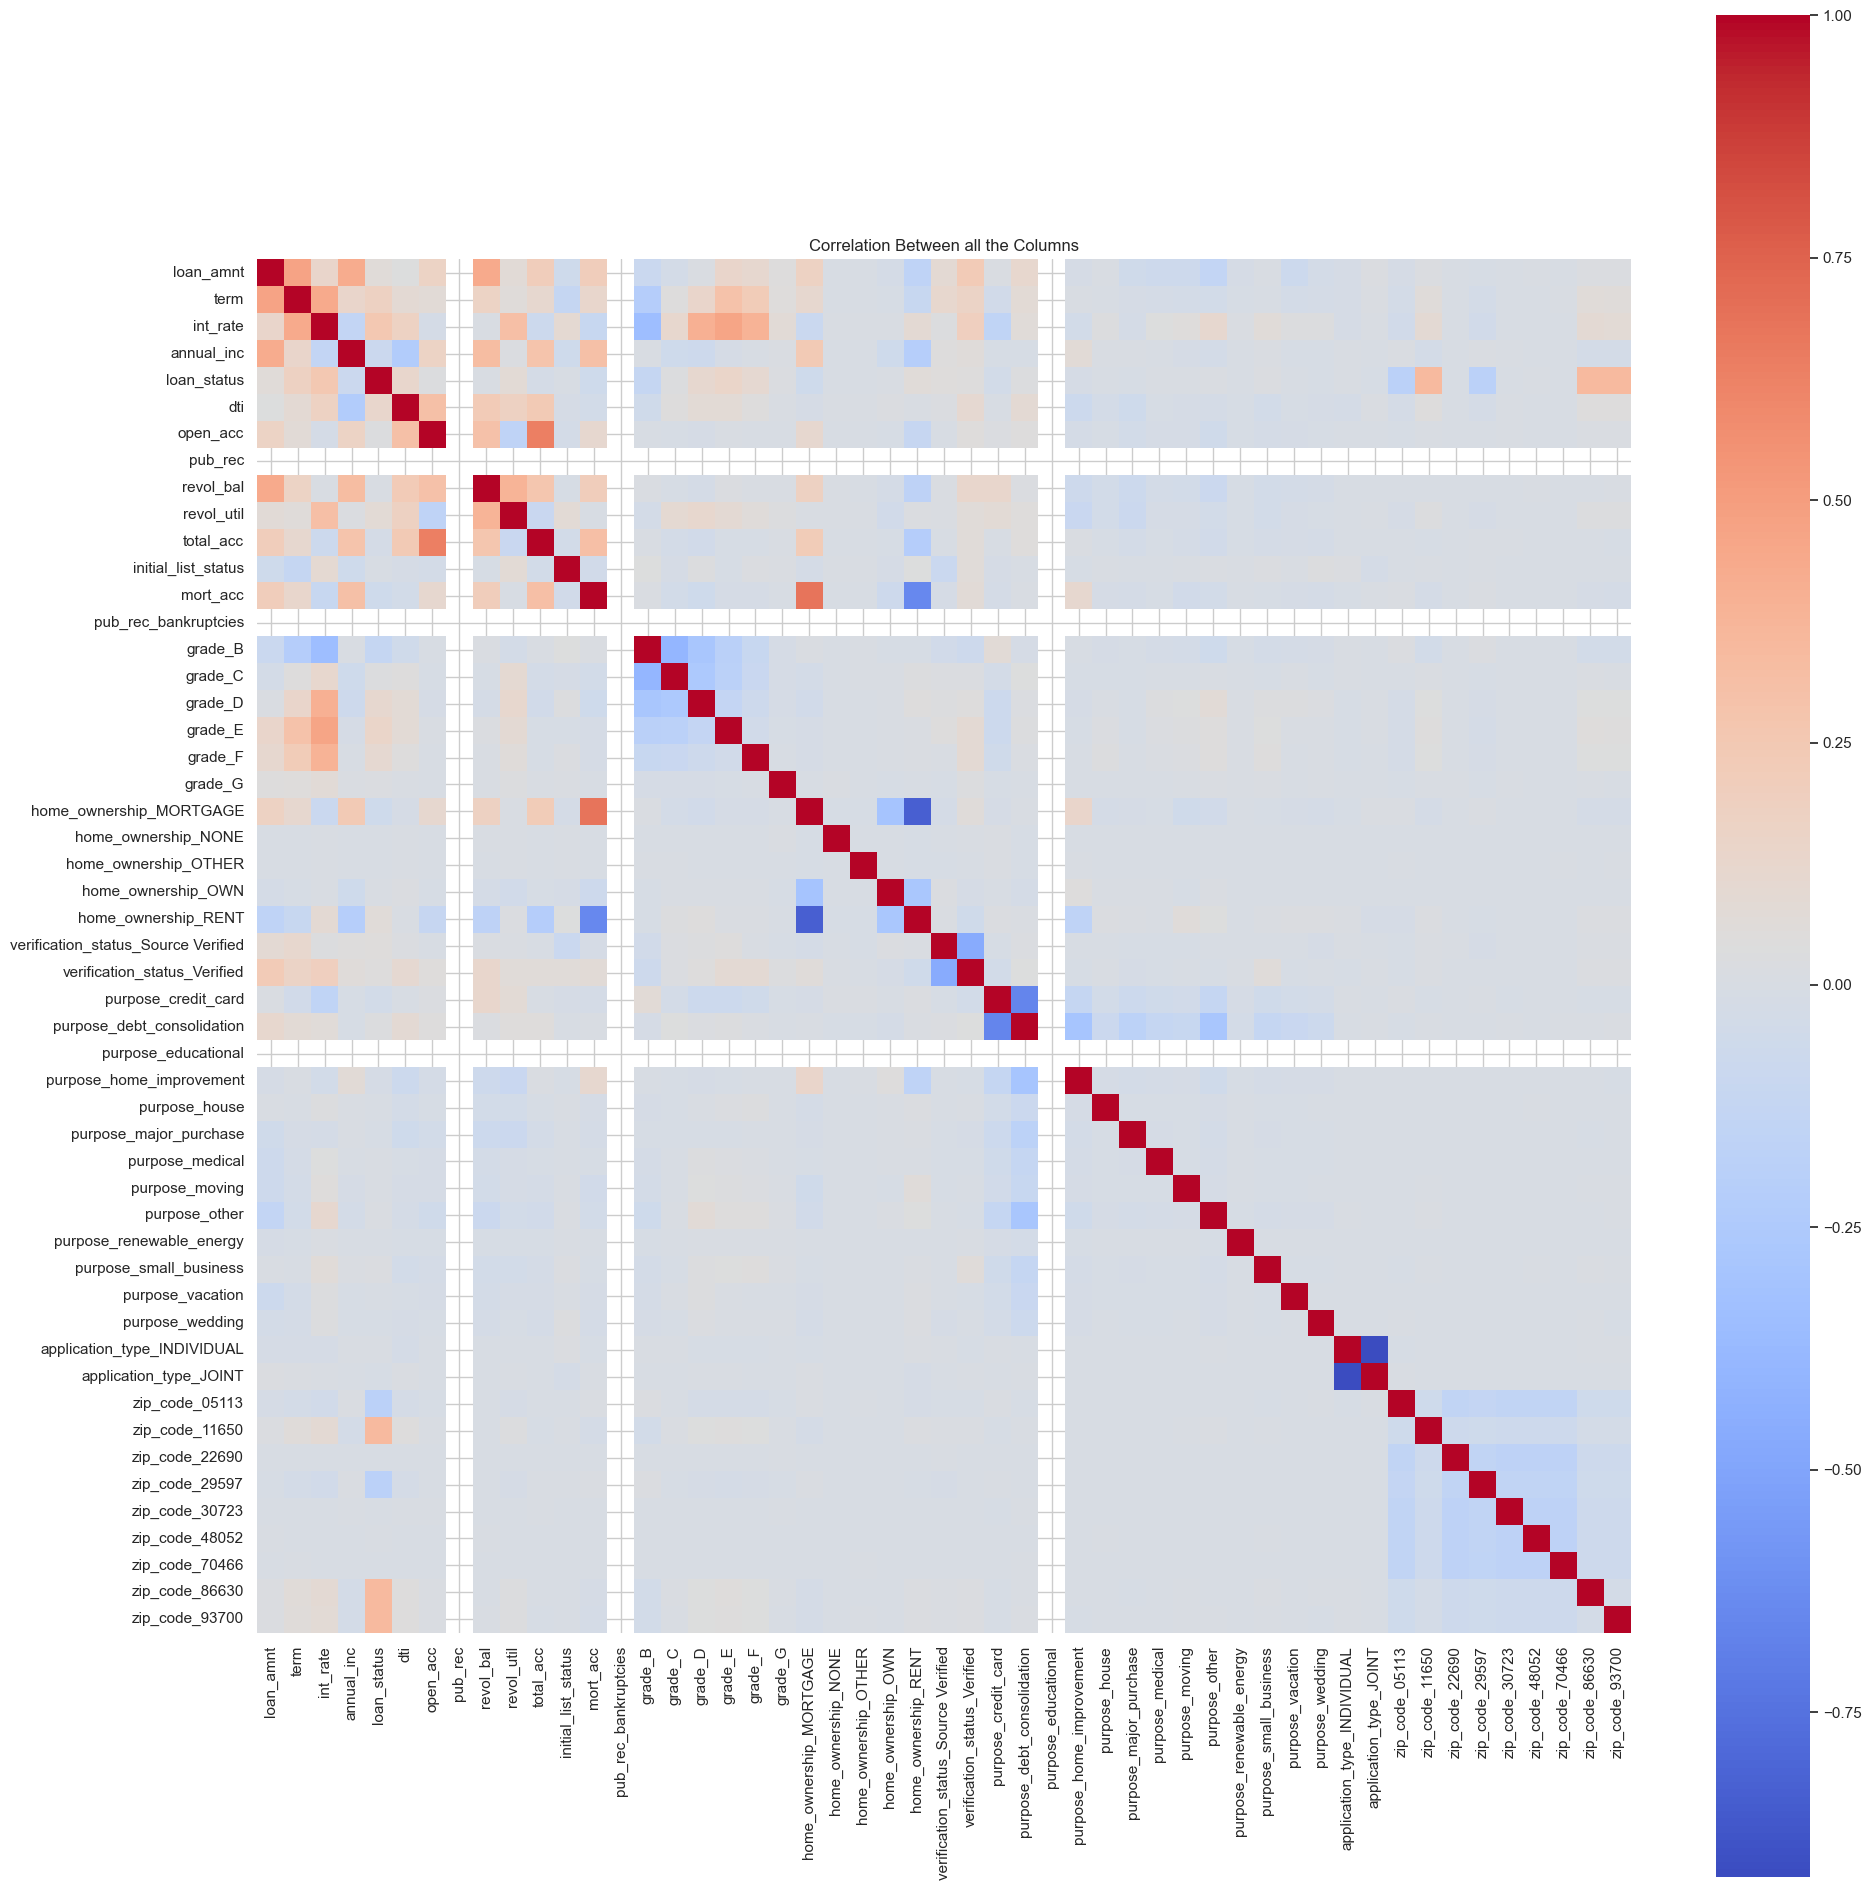

In [31]:
# correlation between all the columns
corr_matrix = df.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr_matrix, cmap = "coolwarm", square = True)
plt.title("Correlation Between all the Columns")
plt.tight_layout()
plt.savefig("../artifacts/heatmap_post_feature_engineering.png")
plt.show()

In [32]:
# data preparation for model building

In [33]:
# separating features (x) and target (y)
x = df.drop(columns = ["loan_status"])
y = df["loan_status"]

In [34]:
# splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, stratify = y, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((190202, 50), (47551, 50), (190202,), (47551,))

In [35]:
# scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [36]:
# model building

In [37]:
# model training
from sklearn.linear_model import LogisticRegression

lgr_model = LogisticRegression()
lgr_model.fit(x_train, y_train)

LogisticRegression()

In [38]:
# saving the model into a .pkl file
import pickle

with open("../artifacts/lgr_model.pkl", "wb") as f:
    pickle.dump(lgr_model, f)

In [39]:
# prediction
y_pred = lgr_model.predict(x_test)

In [40]:
# evaluation of model's performance

In [41]:
# accuracy
# computing the accuracy manually
def lgr_model_accuracy(y_true, y_preds):
    return np.sum(y_true == y_preds)/len(y_true)

model_accuracy = lgr_model_accuracy(y_test, y_pred)
print(f"Accuracy of the Logistic Regression on the Test Data = {model_accuracy}")

Accuracy of the Logistic Regression on the Test Data = 0.8908750604613993


In [42]:
# computing the accuracy using the sklearn module
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8908750604613993

[[37964   246]
 [ 4943  4398]]


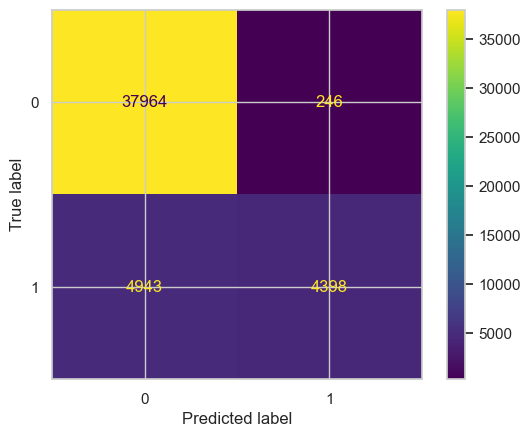

In [43]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print(cm)

cm = ConfusionMatrixDisplay(confusion_matrix = cm)
cm.plot()
plt.savefig("../artifacts/confusion_matrix.png")
plt.show()

ROC AUC Scores = 0.9073178383221925


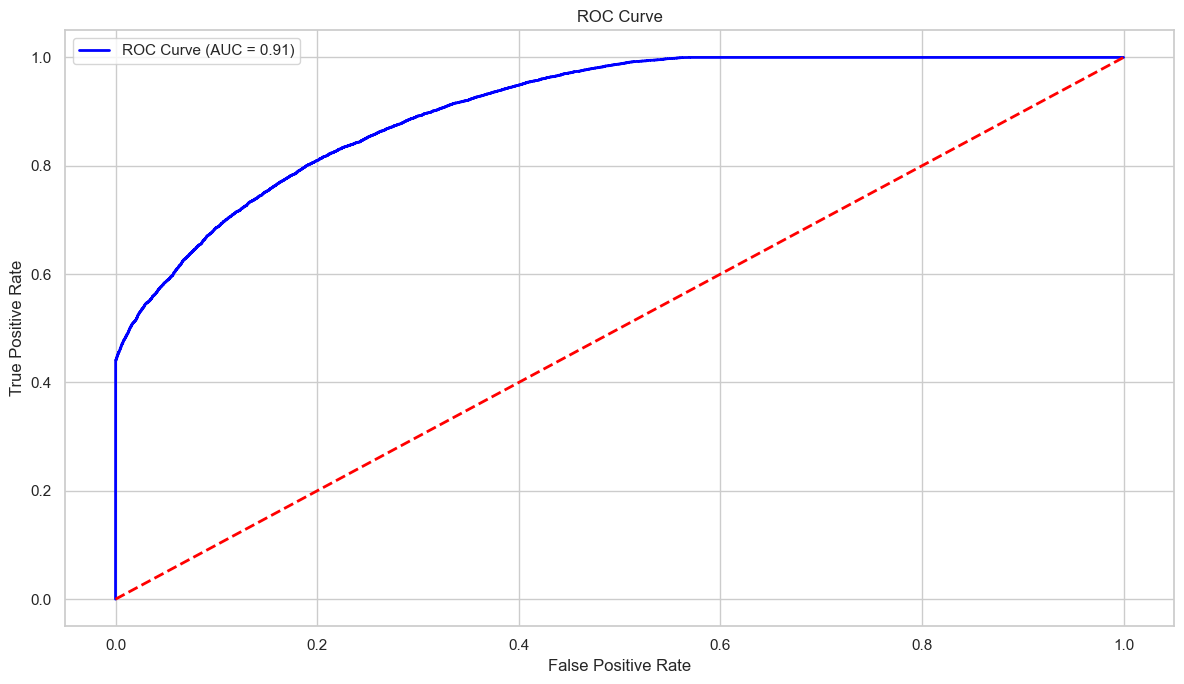

In [44]:
# roc auc curve
from sklearn.metrics import roc_auc_score, auc, roc_curve

y_pred_proba = lgr_model.predict_proba(x_test)[:, 1]

fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
# score = roc_auc_score(y_test, y_pred_proba)
score = auc(fpr, tpr)

print(f"ROC AUC Scores = {score}")

plt.figure(figsize = (12, 7))
plt.plot(fpr, tpr, color = "blue", lw = 2, label = "ROC Curve (AUC = {:.2f})".format(score))
plt.plot([0, 1], [0, 1], color = "red", linestyle = "--", lw = 2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.savefig("../artifacts/roc_curve.png")
plt.show()

PR AUC Score = 0.7815102377891532


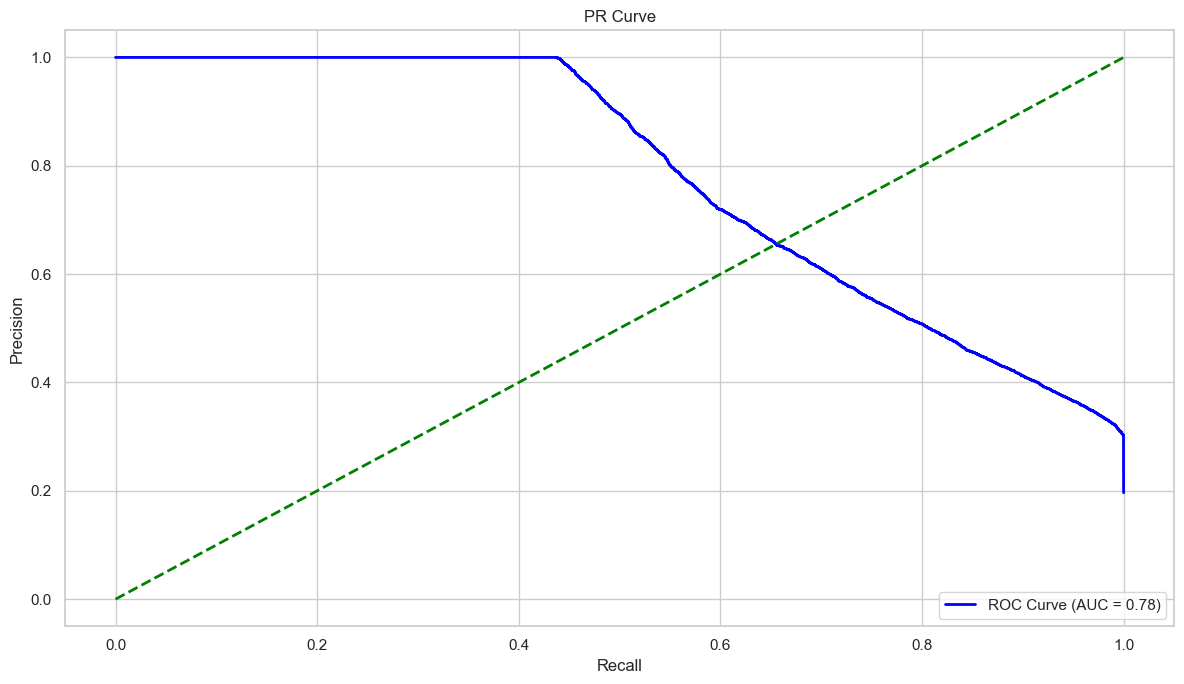

In [45]:
# pr curve
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

print(f"PR AUC Score = {pr_auc}")

plt.figure(figsize = (12, 7))
plt.plot(recall, precision, color = "blue", lw = 2, label = "ROC Curve (AUC = {:.2f})".format(pr_auc))
plt.plot([0, 1], [0, 1], color = "green", linestyle = "--", lw = 2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve")
plt.legend()
plt.tight_layout()
plt.savefig("../artifacts/pr_curve.png")
plt.show()

In [46]:
# classification report
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n\nClassification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[37964   246]
 [ 4943  4398]]


Classification Report
              precision    recall  f1-score   support

           0       0.88      0.99      0.94     38210
           1       0.95      0.47      0.63      9341

    accuracy                           0.89     47551
   macro avg       0.92      0.73      0.78     47551
weighted avg       0.90      0.89      0.88     47551



In [47]:
# model coefficients
coefficients = lgr_model.coef_[0]
feature_names = x.columns

df_coef = pd.DataFrame(
    {
        "Column Name": feature_names, 
        "Coefficient": coefficients
    }
).sort_values(by = "Coefficient", ascending = False)
df_coef

,Column Name,Coefficient
49,zip_code_93700,3.134494
42,zip_code_11650,3.127278
48,zip_code_86630,3.121792
47,zip_code_70466,2.385897
46,zip_code_48052,2.373185
45,zip_code_30723,2.371797
43,zip_code_22690,2.356756
15,grade_D,0.547377
14,grade_C,0.510712
16,grade_E,0.473751
